# **EDA_Inicial**

___
- Oscar Josue Rocha Hernandez
- Rafael Takata Garcia
- Esteban Gomez Valerio

### Librerias

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import kagglehub
import os
import matplotlib.pyplot as plt


### Importar datos

In [8]:
df = pd.read_csv("../data/raw/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
df.shape

(32561, 15)

In [69]:
df.nunique().reset_index(name="nunique").rename(columns={"index": "column"})

,column,nunique
0,age,73
1,workclass,9
2,fnlwgt,21648
3,education,16
4,education.num,16
5,marital.status,7
6,occupation,15
7,relationship,6
8,race,5
9,sex,2


In [16]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [91]:
columnas_cat = ['workclass', 'education', 'marital.status', 'occupation', 'race', 'relationship', 'sex', 'income']
columnas_num = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

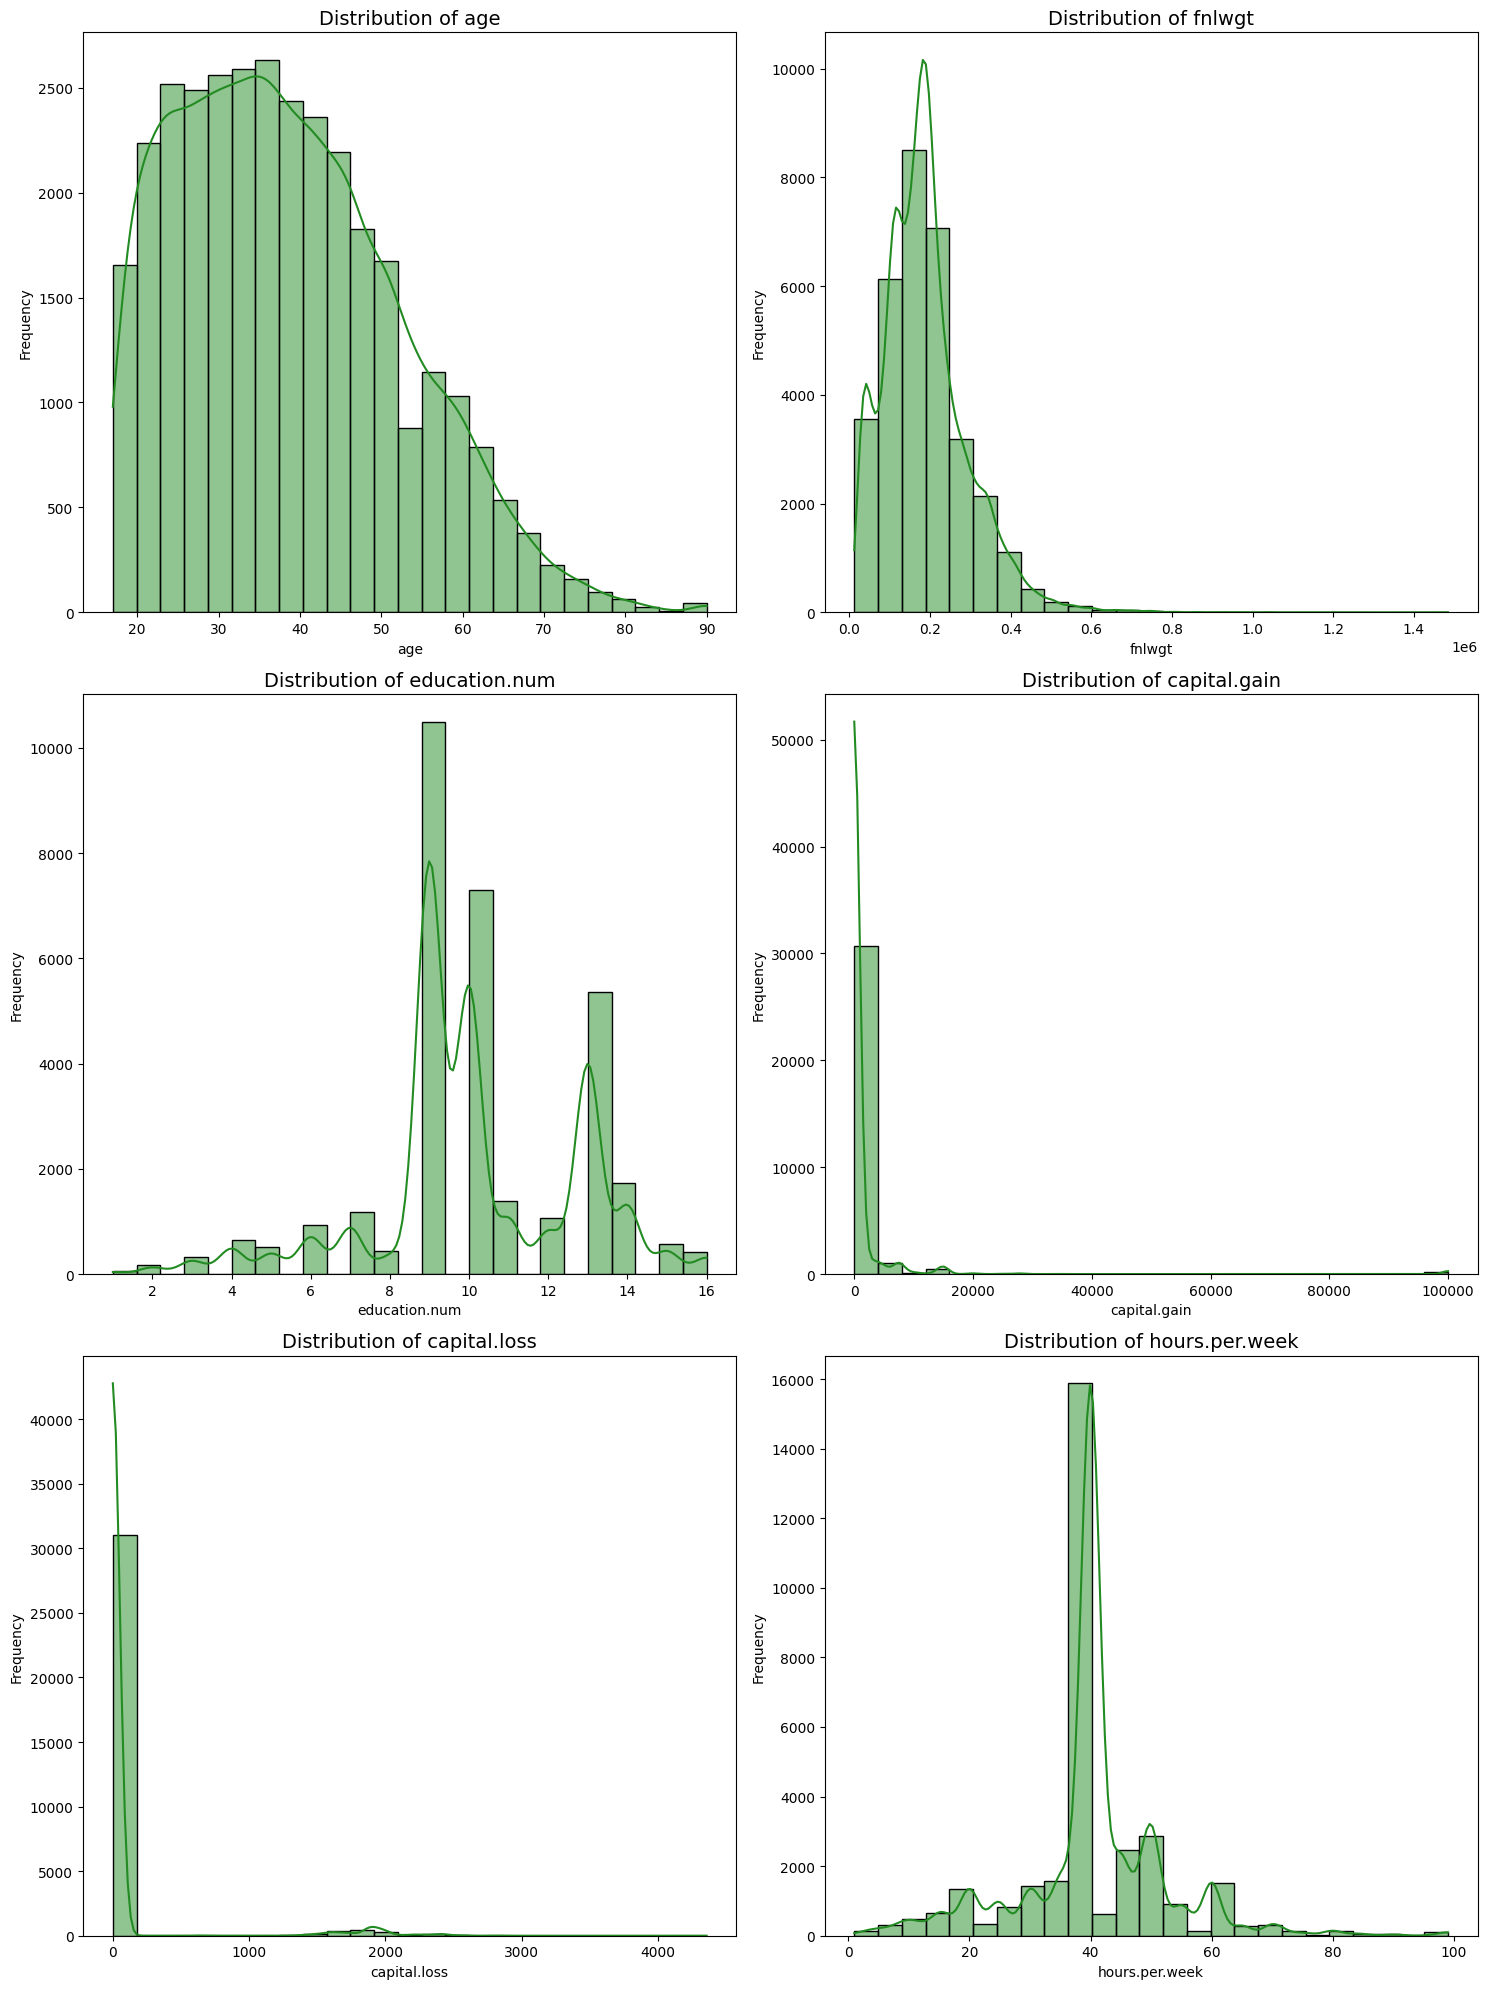

In [92]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(columnas_num, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=column, bins=25, kde=True, color='ForestGreen')
    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\esteb\AppData\Local\Temp\ipykernel_27884\2430084120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\esteb\AppData\Local\Temp\ipykernel_27884\2430084120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\esteb\AppData\Local\Temp\ipykernel_27884\2430084120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\esteb\AppData\Local\Temp\ipykernel_27884\2430084120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

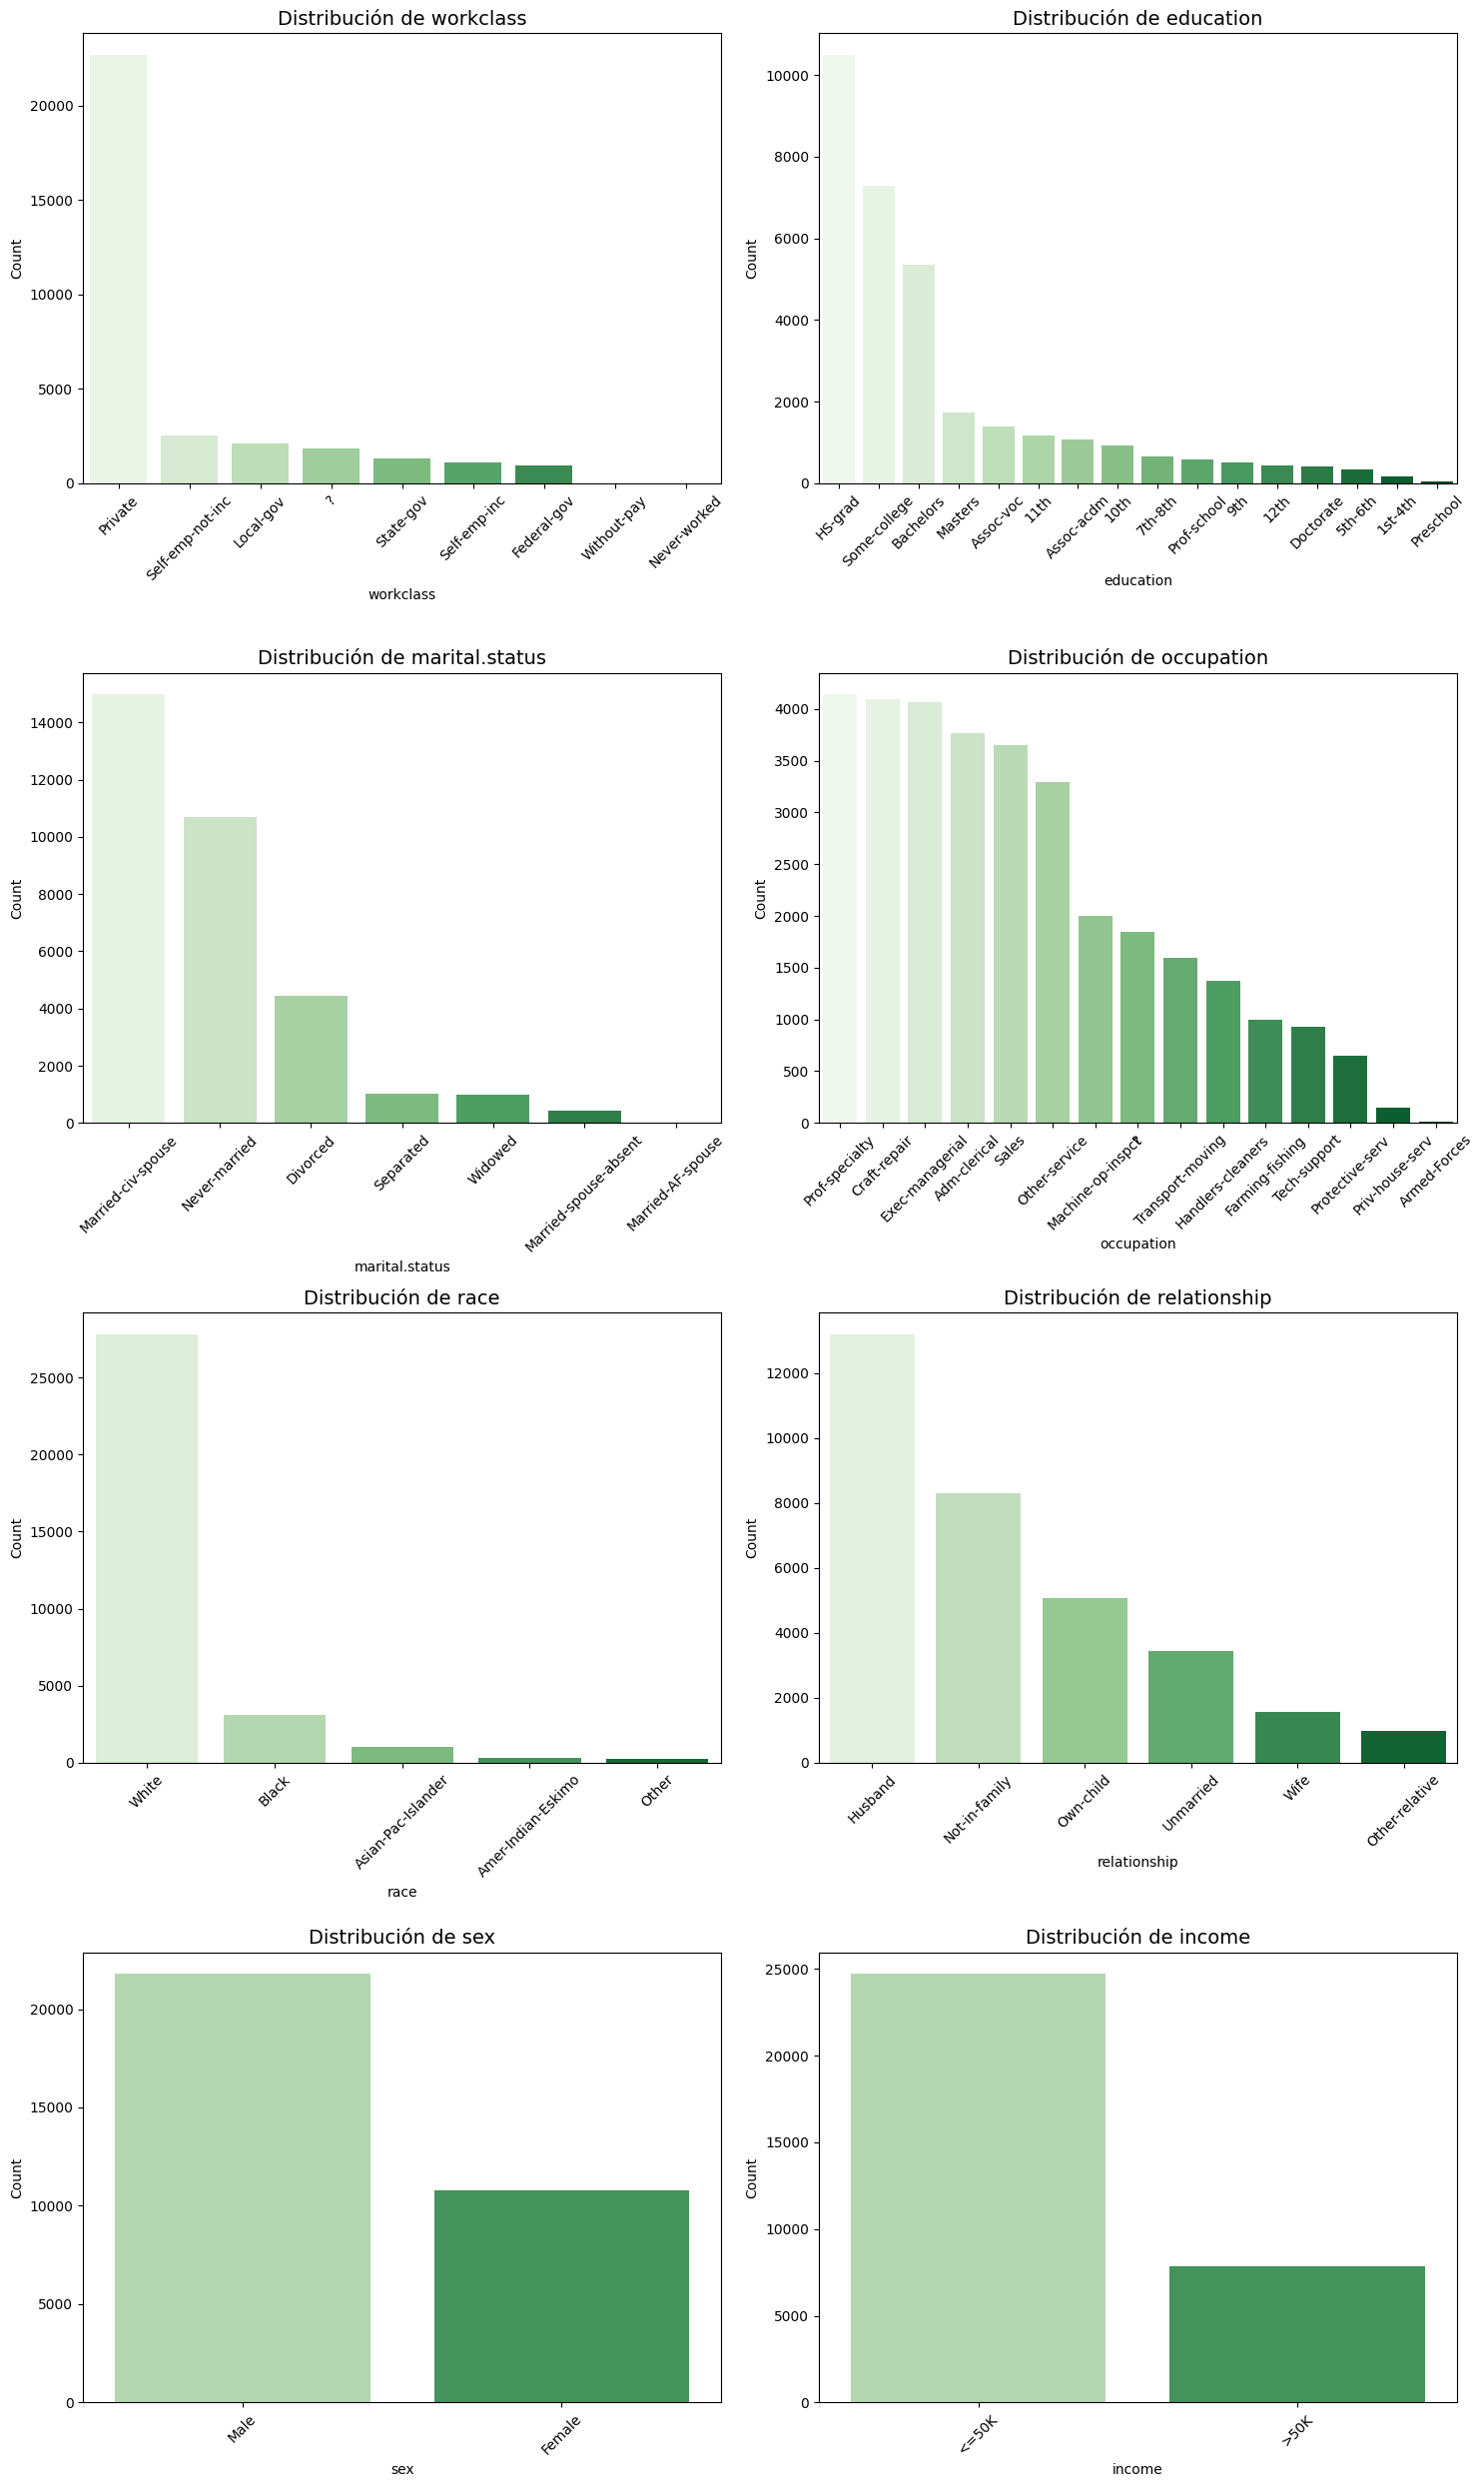

In [96]:
plt.figure(figsize=(15, 25))

for i, column in enumerate(columnas_cat, 1):
    plt.subplot(4, 2, i)
    sns.countplot(
        data=df,
        x=column,
        order=df[column].value_counts().index,
        palette="Greens"   # paleta de verdes
    )
    plt.title(f'Distribución de {column}', fontsize=14)
    plt.xticks(rotation=45)
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


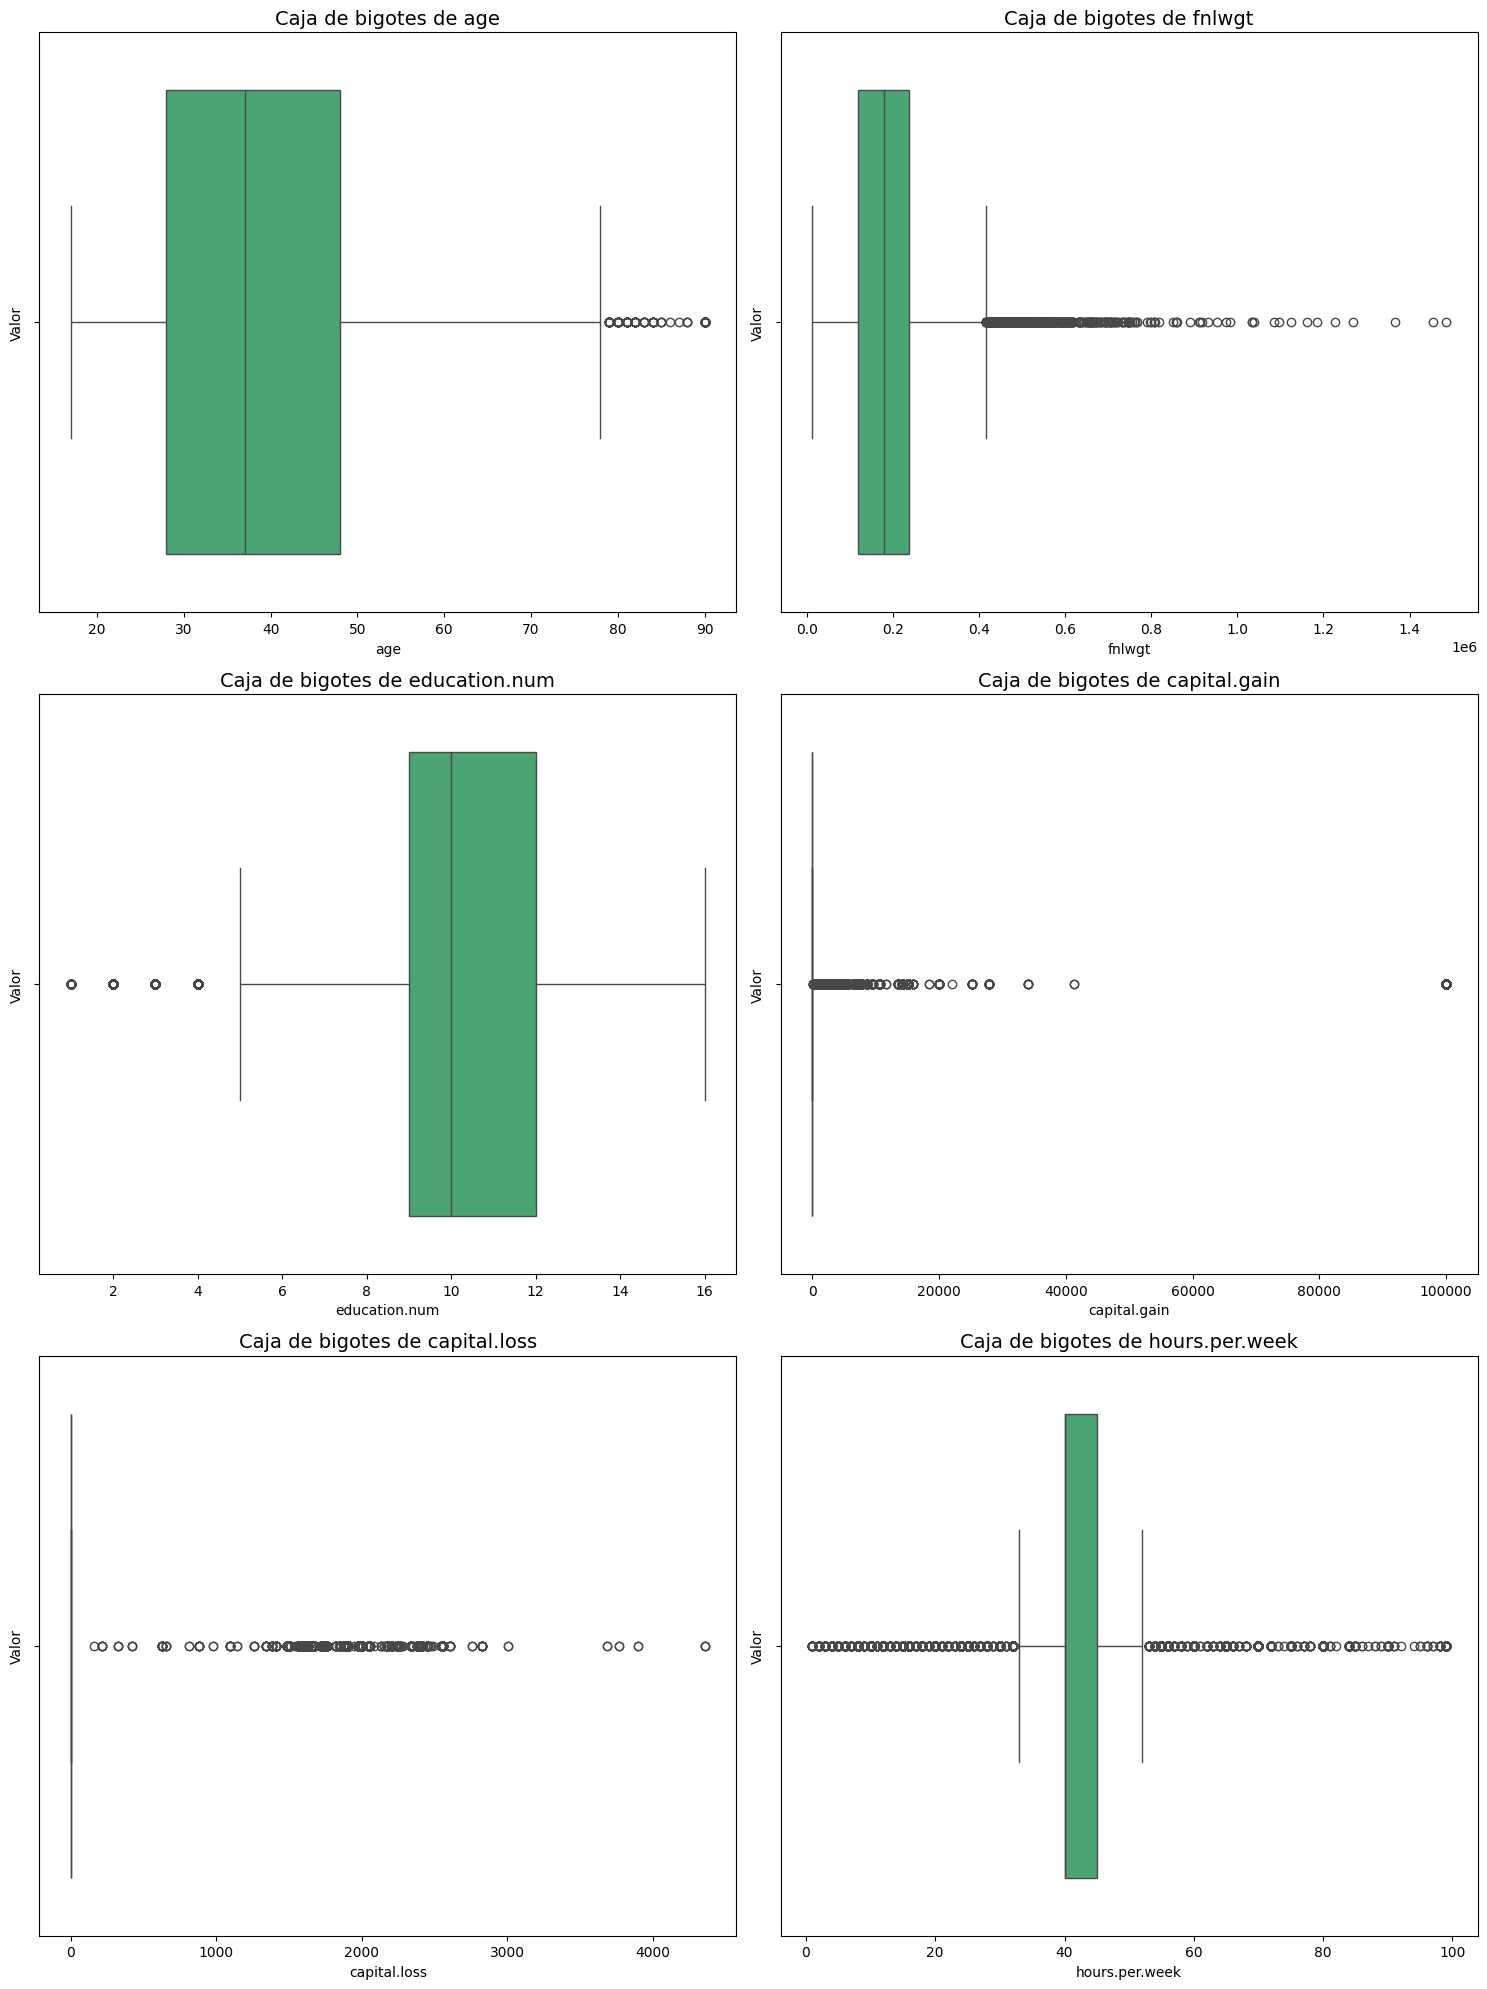

In [99]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(columnas_num, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=column, color="mediumseagreen")
    plt.title(f'Caja de bigotes de {column}', fontsize=14)
    plt.xlabel(column)
    plt.ylabel("Valor")

plt.tight_layout()
plt.show()


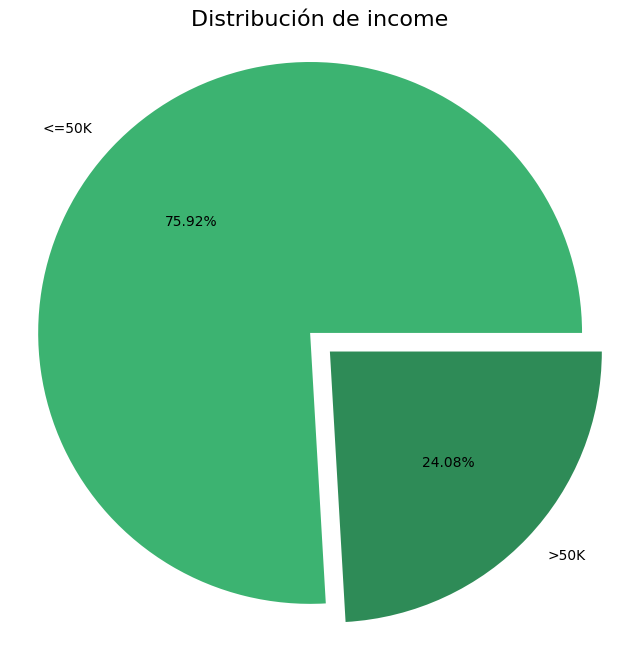

In [105]:
# Datos
counts = df['income'].value_counts()
labels = counts.index

# Gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(
    counts, 
    labels=labels, 
    autopct='%1.2f%%', 
    colors=['mediumseagreen', 'seagreen'], 
    explode=(0.05, 0.05)
)
plt.title('Distribución de income', fontsize=16)
plt.axis('equal') 
plt.show()

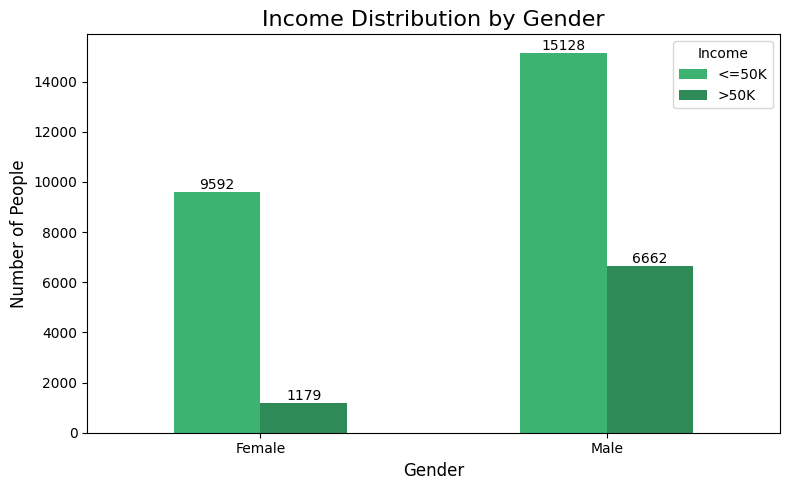

In [ ]:
# Distribucion de income por genero
sex_income_counts = df.groupby(['sex', 'income']).size().unstack(fill_value=0)

ax = sex_income_counts.plot(kind='bar', figsize=(8, 5), color=['mediumseagreen', 'seagreen'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)

plt.title('Income Distribution by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

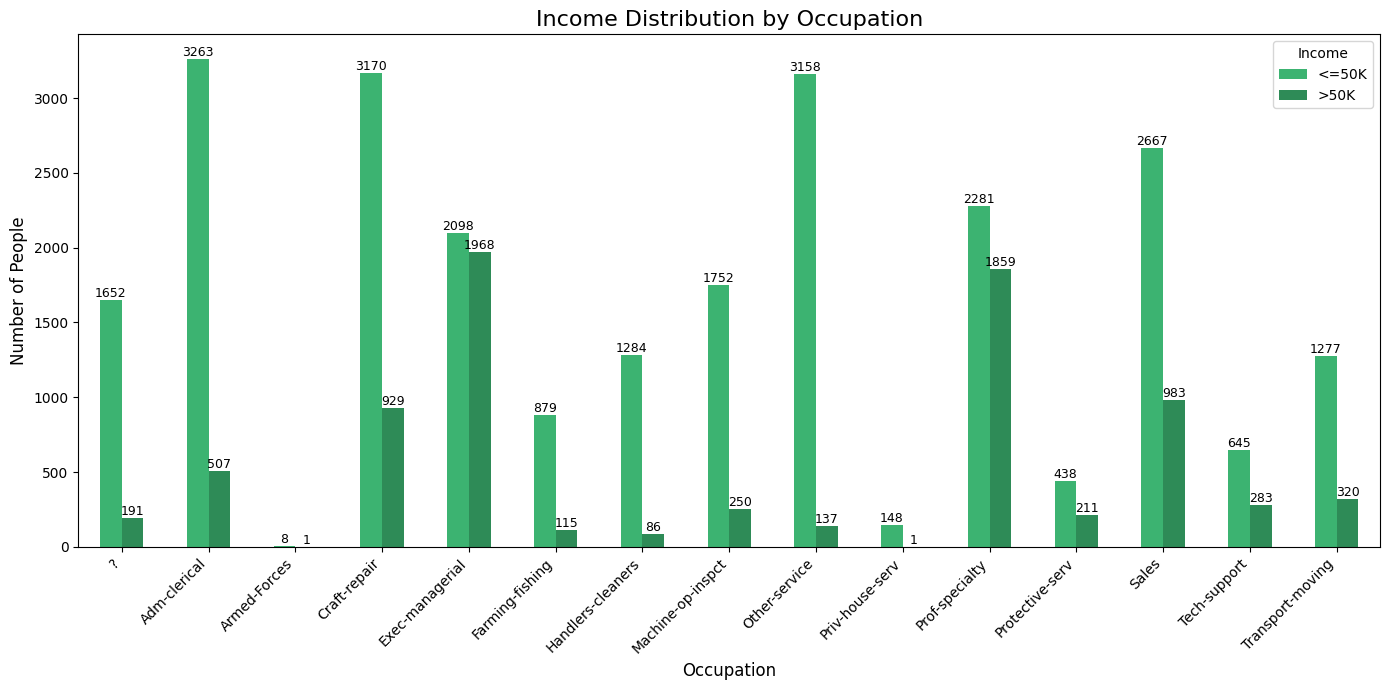

In [ ]:
# Distribucion de income por ocupacion
occupation_income_counts = df.groupby(['occupation', 'income']).size().unstack(fill_value=0)

ax = occupation_income_counts.plot(kind='bar', figsize=(14, 7), color=['mediumseagreen', 'seagreen'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Income Distribution by Occupation', fontsize=16)
plt.xlabel('Occupation', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Income')
plt.tight_layout()
plt.show()

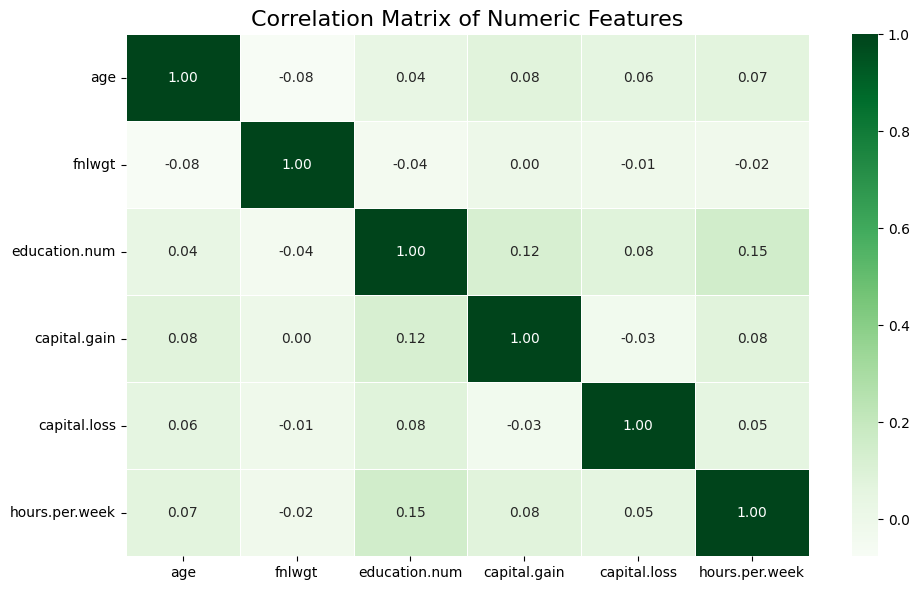

In [ ]:
# Matriz de correlacion
numeric_columns = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()